# Exploratory NLP Harry Potter Analysis 

This is a brief dive into text analysis using the VADER classification on the each character in the third Harry Potter movie script. Some findings were definitely interesting (e.g. Draco, who turned out with a higher score than expected, and Mr. Weasley, who got a lower score) but for most characters, the compound numbers seemed pretty empirically accurate (it was interesting to see how high of a school Lupin and Dumbledore got, for example). In the future, I will be expanding this to analyze the scripts of all eight movies, which I believe will improve accuracy. I am hoping to use these results in another project.

The scripts for the first three movies can be found on [Kaggle](https://www.kaggle.com/gulsahdemiryurek/harry-potter-dataset).

In [1]:
# importing necessary packages

import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [61]:
script = pd.read_csv('Harry Potter 3.csv')
script.head()

# the script is a simple table, with character and sentence on each row

,CHARACTER,SENTENCE
0,HARRY,Lumos Maxima...
1,HARRY,Lumos Maxima...
2,HARRY,Lumos Maxima...
3,HARRY,Lumos... MAXIMA!
4,AUNT PETUNIA,Harry! Harry!


The following is just some helper functions for analyzing the text. I don't use all of them in this analysis, mainly `character_sentiment()`, which is a quick way to see scores for a particular character.

In [4]:
def get_sent_tokens(data):
    """Sentence tokenization"""
    sentences = []
    for sent in data:
        sentences.extend(sent_tokenize(sent))
    print('\nSentence tokens:', sentences)
    return sentences

In [5]:
def get_clean_sentences(script, remove_digits=False):
    sentences = get_sent_tokens(script)
    '''Cleaning sentences by removing special characters and optionally digits'''
    clean_sentences = []
    for sent in sentences:
        pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]' 
        clean_text = re.sub(pattern, '', sent) # Applying regex filter
        clean_text = clean_text.lower()  # Converting to lower case
        clean_sentences.append(clean_text)
    # print('\nClean sentences:', clean_sentences)
    return clean_sentences

In [21]:
def character_sentiment(character):
    # filter the script for the particular character
    lines = script[script['CHARACTER'] == character]
    lines_sentences = lines['SENTENCE'].values


    score = analyser.polarity_scores(lines_sentences) # this is the vader analyzer
    print(character) 
    print('---------------------------------')
    print('MOVIE SCRIPT SCORE:')
    print('')
    print(score) # print the score
    print('')

## Character Analysis

As you can see, here I've printed a few characters' sentiment scores from VADER. VADER is useful because it was specifically meant to analyse social media data, meaning it's already been trained on a general corpus and doesn't need any more training data. It also applies an intensity score, the 'compound' label.

In [22]:
character_sentiment('HARRY')

HARRY
---------------------------------
MOVIE SCRIPT SCORE:

{'neg': 0.067, 'neu': 0.854, 'pos': 0.078, 'compound': 0.865}



'neg', 'neu', and 'pos' represent the proportion of sentences for that character that were negative, neutral, and positive, respectively (which means these should all add up to 1). The 'compound' score is a normalization of VADER's lexicon scores (the scores in its general corpus) for the character. It's a range between -1 (extremely negative) to 1 (extremely positive).

Harry is generally pretty neutral, and his compound score is trending positive.

In [26]:
character_sentiment('RON')

RON
---------------------------------
MOVIE SCRIPT SCORE:

{'neg': 0.128, 'neu': 0.819, 'pos': 0.053, 'compound': -0.9951}



Here's Ron! He's *super* negative when it comes to his compound score.

Draco (below) is a little more interesting. Weirdly, it shows that his compound score is fairly positive. The other scores line up with that as well, although he's definitely an antagonistic character. I'm sure this will change as I add in more data from other scripts, especially the fifth and sixth ones, and it also might be because he tends to resort to sarcasm.

In [25]:
character_sentiment('DRACO')

DRACO
---------------------------------
MOVIE SCRIPT SCORE:

{'neg': 0.098, 'neu': 0.784, 'pos': 0.118, 'compound': 0.5076}



In [62]:
script[script['CHARACTER'] == 'DRACO'].values

# the sarcasm is clear here. also not a whole lot of values compared to harry, ron, and hermione.

array([['DRACO', 'Potter. Is it true you fainted?'],
       ['DRACO', 'I mean, you actually fainted?'],
       ['DRACO', 'Exactly how do we do that?'],
       ['DRACO', "Don't be such a wimp, Longbottom."],
       ['DRACO', 'Oh, yeah. Terribly funny.'],
       ['DRACO', 'Witty. God, this place has gone to the dogs.'],
       ['DRACO',
        "Wait until Father hears Dumbledore's got this oaf teaching classes."],
       ['DRACO', 'Dementor! Dementor!'],
       ['DRACO', 'Oh, please.'],
       ['DRACO',
        "You're not dangerous at all, are you, you great ugly brute!"],
       ['DRACO', "It's killed me!"],
       ['DRACO', "You're gonna regret this."],
       ['DRACO', 'You and your bloody chicken!'],
       ['DRACO', 'It comes and it goes.'],
       ['DRACO', 'Still, I consider myself lucky.'],
       ['DRACO',
        "Madam Pomfrey said another minute and I could've lost my arm."],
       ['DRACO', "I can't do homework for weeks."],
       ['DRACO', 'This class is ridiculous.'],


In [27]:
character_sentiment('HERMIONE')

HERMIONE
---------------------------------
MOVIE SCRIPT SCORE:

{'neg': 0.077, 'neu': 0.859, 'pos': 0.064, 'compound': -0.7522}



Hermione, like Ron, is very negative in her compound score. This was a pretty dark movie, I think, so I wonder how these characters' scores might trend and normalize over time—we might start to see clearer patterns and characterizations, and also notice the distinction between earlier books (where the characters might be more positive) and later books (which definitely trend dark and negative as they deal with heavier matter).

In any case, I've just collected all the characters who show up in this script and sentiment-analyzed each one. Then for some, I've plotted it in a graph, which you can see below.

In [63]:
characters = []

for c in script['CHARACTER'].to_list():
    if c not in characters:
        characters.append(c)

In [43]:
def character_scorer(character):
    lines = script[script['CHARACTER'] == character]
    lines_sentences = lines['SENTENCE'].values


    score = analyser.polarity_scores(lines_sentences) 
    score['character'] = character;
    return score

sentiment_scores = []

for c in characters:
    sentiment_scores.append(character_scorer(c))

sentiment_scores

[{'neg': 0.067,
  'neu': 0.854,
  'pos': 0.078,
  'compound': 0.865,
  'character': 'HARRY'},
 {'neg': 0.0,
  'neu': 0.738,
  'pos': 0.262,
  'compound': 0.7156,
  'character': 'AUNT PETUNIA'},
 {'neg': 0.041,
  'neu': 0.884,
  'pos': 0.075,
  'compound': -0.3875,
  'character': 'UNCLE VERNON'},
 {'neg': 0.132,
  'neu': 0.794,
  'pos': 0.074,
  'compound': -0.9297,
  'character': 'AUNT MARGE'},
 {'neg': 0.012,
  'neu': 0.95,
  'pos': 0.038,
  'compound': 0.594,
  'character': 'STAN SHUNPIKE'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'character': '\nSTAN SHUNPIKE'},
 {'neg': 0.026,
  'neu': 0.855,
  'pos': 0.12,
  'compound': 0.791,
  'character': 'SHRUNKEN HEAD'},
 {'neg': 0.0,
  'neu': 0.87,
  'pos': 0.13,
  'compound': 0.4019,
  'character': 'TOM'},
 {'neg': 0.099,
  'neu': 0.796,
  'pos': 0.106,
  'compound': -0.5651,
  'character': 'FUDGE'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'character': 'VENDOR'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0

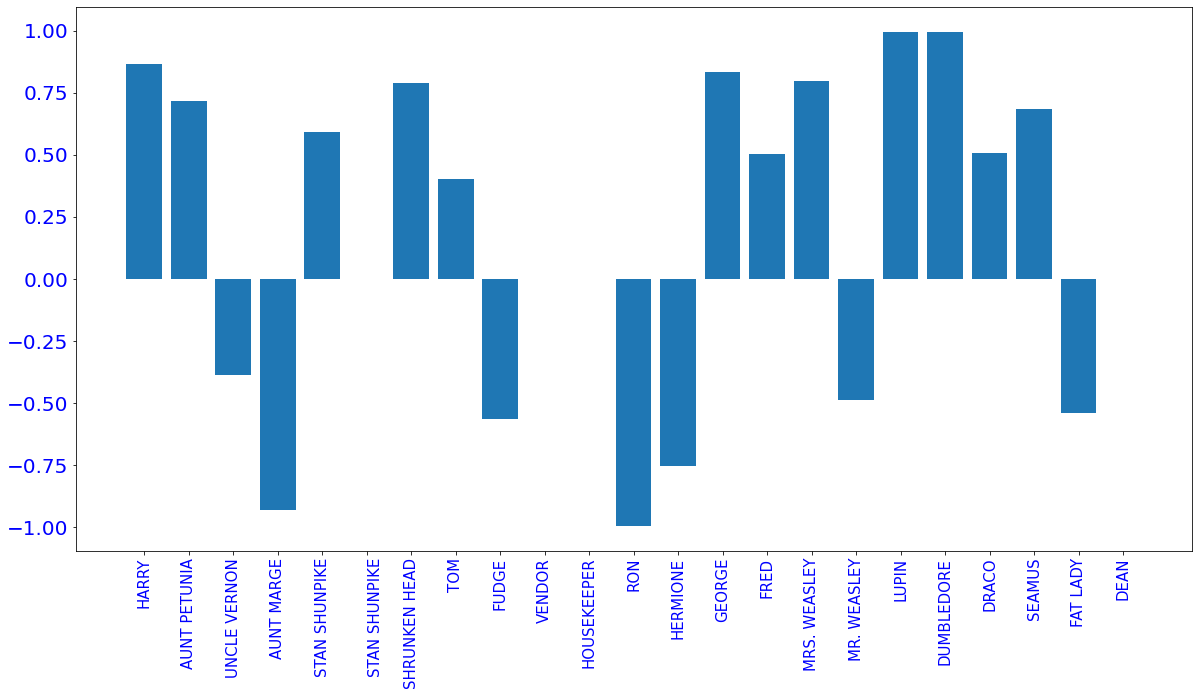

In [60]:
df = pd.DataFrame(sentiment_scores)

import matplotlib.pyplot as plt

subset = df.iloc[0:23]
fig, ax = plt.subplots()
ax.bar(subset['character'], subset['compound'])
fig.set_size_inches(20, 10)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.xticks(size=15, color='blue');
plt.yticks(size=20, color='blue');

Look at that! For the characters where there are blank spaces, I believe that's just where there's not enough data to gather sentiment, so it reads as zero (a line or two). For the other major characters, this is really cool! Aunt Marge is *much* more negative than Aunt Petunia and Uncle Vernon, on par with Ron (and his persistent worries).
Harry himself is pretty positive, just above George and Ms. Weasley (and, for some reason, the Knight Bus's Shrunken Head), but not the most positive—Lupin and Dumbledore take that spot.
Out of these characters, most are overall positive. Uncle Vernon, Aunt Marge, Fudge, Ron, Hermione, Mr. Weasley, and the Fat Lady are the only ones who have negative compound scores.

## Next Steps
- Planning to put this in an app that will use the Twitter API! Look out for that 👀
- Apply the same technique to the full set of scripts (and I might have to parse the last five)
- Track sentiment over time
- Figure out Voldemort's sentiment using VADER (he doesn't show up in this movie, but I am very interested to see how his sentiment might trend over time)